In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import seaborn as sns #graficas y estadistica



from sklearn.model_selection import train_test_split # pro ahor an
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os #sistema op



In [93]:

os.chdir('C:/Users/Julian/Documents/MMA/PYTHONLUZ')
cwd=os.getcwd() # asigan variable swd al directorio
xls_file = "Colombia-Feb21.xlsx"


# TOMANDO LOS DATOS DE LOS EQUIPOS

df = pd.read_excel(xls_file, header= 0, sep=';', index_col=0)

In [94]:
df.head(10)

,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
Organization Name,,,,,,,,,,,,,,
La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","MedellÃ­n, Antioquia, Colombia",La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"BogotÃ¡, Distrito Especial, Colombia",Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","BogotÃ¡, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","BogotÃ¡, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
Rappi,https://www.crunchbase.com/organization/rappi,"Consumer Goods, E-Commerce, Food Delivery","BogotÃ¡, Distrito Especial, Colombia",Rappi is a consumer tech company that speciali...,6.377,2015-01-01 00:00:00,year,2020-09-24 00:00:00,300000000,USD,300000000.0,300000000,USD,300000000.0
Valiu,https://www.crunchbase.com/organization/valiu,"Cryptocurrency, Finance, Financial Services, F...","BogotÃ¡, Distrito Especial, Colombia",Valiu is a developing a digital remittance pla...,7.15,2018-09-17 00:00:00,day,2020-12-04 00:00:00,5250000,USD,5250000.0,5250000,USD,5250000.0
RobinFood,https://www.crunchbase.com/organization/muy,"Food and Beverage, Food Delivery, Restaurants,...","BogotÃ¡, Distrito Especial, Colombia",RobinFood is an operator of a chain of restaur...,7.452,2018-03-01 00:00:00,month,2020-10-02 00:00:00,16000000,USD,16000000.0,15000000,USD,15000000.0
Habi,https://www.crunchbase.com/organization/habi-fefd,"Home Renovation, Real Estate, Real Estate Inve...","BogotÃ¡, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,7.768,2019-07-01 00:00:00,month,2020-08-26 00:00:00,10000000,USD,10000000.0,10000000,USD,10000000.0


In [95]:
df = df.drop(['Organization Name URL'], axis=1)

In [96]:
df

,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
Organization Name,,,,,,,,,,,,,
La Haus,"Information Technology, Marketplace, Real Esta...","MedellÃ­n, Antioquia, Colombia",La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
Dondo,NaN,"BogotÃ¡, Distrito Especial, Colombia",Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
Aflore,"Credit, Finance, Financial Services, FinTech","BogotÃ¡, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
Liftit,"Freight Service, Internet, Last Mile Transport...","BogotÃ¡, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paperplane,"Social Media, Web Apps, Web Development","BogotÃ¡, Distrito Especial, Colombia",Paperplane is a web development company specia...,755.646,2012-11-01 00:00:00,month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dequr.com,"Consumer Reviews, Customer Service, Online Forums","MedellÃ­n, Antioquia, Colombia",Dequr.com quejas y reclamos en Internet,757.737,2010-10-14 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGBOX,"Fitness, Health Care, Wellness","Madrid, Distrito Especial, Colombia",GGBOX is a monthly selection of vaping liquids...,759.176,2017-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df= df.replace({"BogotÃ¡, Distrito Especial, Colombia": "Bogotá", "MedellÃ­n, Antioquia, Colombia" : "Medellín"})
df

,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
Organization Name,,,,,,,,,,,,,
La Haus,"Information Technology, Marketplace, Real Esta...",Medellín,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
Dondo,NaN,Bogotá,Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
Aflore,"Credit, Finance, Financial Services, FinTech",Bogotá,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
Liftit,"Freight Service, Internet, Last Mile Transport...",Bogotá,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paperplane,"Social Media, Web Apps, Web Development",Bogotá,Paperplane is a web development company specia...,755.646,2012-11-01 00:00:00,month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dequr.com,"Consumer Reviews, Customer Service, Online Forums",Medellín,Dequr.com quejas y reclamos en Internet,757.737,2010-10-14 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGBOX,"Fitness, Health Care, Wellness","Madrid, Distrito Especial, Colombia",GGBOX is a monthly selection of vaping liquids...,759.176,2017-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df2=df.dropna()
df2

,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
Organization Name,,,,,,,,,,,,,
La Haus,"Information Technology, Marketplace, Real Esta...",Medellín,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
Aflore,"Credit, Finance, Financial Services, FinTech",Bogotá,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
Liftit,"Freight Service, Internet, Last Mile Transport...",Bogotá,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
Rappi,"Consumer Goods, E-Commerce, Food Delivery",Bogotá,Rappi is a consumer tech company that speciali...,6.377,2015-01-01 00:00:00,year,2020-09-24 00:00:00,300000000,USD,300000000.0,300000000,USD,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Geelbe,"Brand Marketing, E-Commerce, Fashion, Nightclu...",Bogotá,Geelbe is a private internet purchasing club p...,318.399,2008-01-01 00:00:00,year,2009-12-11 00:00:00,3200000,USD,3200000.0,3200000,USD,3200000.0
Icanbesponsored,Sports,Bogotá,Icanbesponsored is an online company that enab...,323.92,2012-01-01 00:00:00,year,2012-08-10 00:00:00,1000,USD,1000.0,1000,USD,1000.0
Milmenus.com,"Mobile, Restaurants",Bogotá,Milmenus is a Colombia-based restaurant menu g...,382.158,2010-06-07 00:00:00,day,2010-06-07 00:00:00,7500,USD,7500.0,7500,USD,7500.0


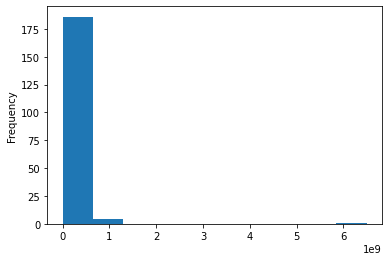

In [158]:
df2["Last Funding Amount"].plot(kind="hist")
plt.show()

In [159]:
df_ts= df2.iloc[:,[7,8] ]
df_ts



,Last Funding Amount,Last Funding Amount Currency
Organization Name,,
La Haus,35000000,USD
Aflore,6500000,USD
Liftit,22500000,USD
Chiper,12000000,USD
Rappi,300000000,USD
...,...,...
Geelbe,3200000,USD
Icanbesponsored,1000,USD
Milmenus.com,7500,USD


In [160]:
sorted_by_gross = df2.sort_values(['Last Funding Amount'], ascending=False)
print(sorted_by_gross.head(10))




                                                                Industries  \
Organization Name                                                            
Reciclados Industriales                    Industrial, Mining, Oil and Gas   
Pidefarma                        Beauty, E-Commerce, Health Care, Internet   
Telemetrik               Industrial, Internet of Things, Marketing Auto...   
Ocensa                                                         Oil and Gas   
Vosavos                                             Child Care, Recruiting   
LifeMiles                Air Transportation, Loyalty Programs, Public T...   
Nethub                   Analytics, Business Intelligence, Enterprise S...   
Rappi                            Consumer Goods, E-Commerce, Food Delivery   
Sarta                                         Fashion, Lifestyle, Shopping   
StartBull                Financial Services, Internet, Social Media, So...   

                                Headquarters Location  \
Organi

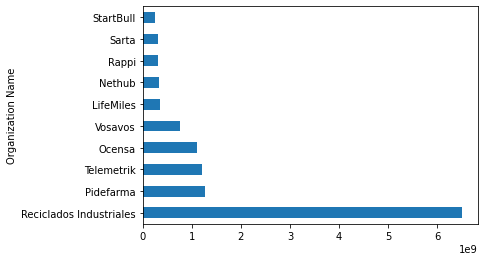

In [161]:
sorted_by_gross['Last Funding Amount'].head(10).plot(kind="barh")
plt.show()

In [162]:
df2.columns
df2.iloc[:,1]

Organization Name
La Haus                                             Medellín
Aflore                                                Bogotá
Liftit                                                Bogotá
Chiper             Cundinamarca, Distrito Especial, Colombia
Rappi                                                 Bogotá
                                     ...                    
Geelbe                                                Bogotá
Icanbesponsored                                       Bogotá
Milmenus.com                                          Bogotá
LatinMedios                                           Bogotá
Toomga                                                Bogotá
Name: Headquarters Location, Length: 191, dtype: object

In [163]:
df2

,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
Organization Name,,,,,,,,,,,,,
La Haus,"Information Technology, Marketplace, Real Esta...",Medellín,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
Aflore,"Credit, Finance, Financial Services, FinTech",Bogotá,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
Liftit,"Freight Service, Internet, Last Mile Transport...",Bogotá,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
Rappi,"Consumer Goods, E-Commerce, Food Delivery",Bogotá,Rappi is a consumer tech company that speciali...,6.377,2015-01-01 00:00:00,year,2020-09-24 00:00:00,300000000,USD,300000000.0,300000000,USD,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Geelbe,"Brand Marketing, E-Commerce, Fashion, Nightclu...",Bogotá,Geelbe is a private internet purchasing club p...,318.399,2008-01-01 00:00:00,year,2009-12-11 00:00:00,3200000,USD,3200000.0,3200000,USD,3200000.0
Icanbesponsored,Sports,Bogotá,Icanbesponsored is an online company that enab...,323.92,2012-01-01 00:00:00,year,2012-08-10 00:00:00,1000,USD,1000.0,1000,USD,1000.0
Milmenus.com,"Mobile, Restaurants",Bogotá,Milmenus is a Colombia-based restaurant menu g...,382.158,2010-06-07 00:00:00,day,2010-06-07 00:00:00,7500,USD,7500.0,7500,USD,7500.0


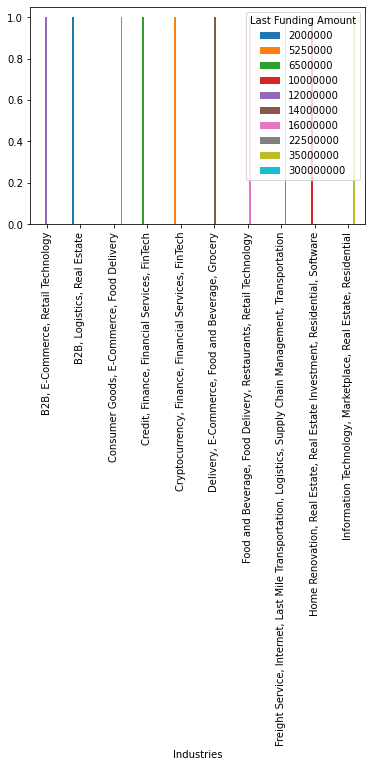

In [164]:
pd.crosstab(df2["Industries"].head(10),df2["Last Funding Amount"].head(10)).plot(kind='bar')

In [165]:
df2.columns

Index(['Industries', 'Headquarters Location', 'Description',
       'CB Rank (Company)', 'Founded Date', 'Founded Date Precision',
       'Last Funding Date', 'Last Funding Amount',
       'Last Funding Amount Currency', 'Last Funding Amount Currency (in USD)',
       'Last Equity Funding Amount', 'Last Equity Funding Amount Currency',
       'Last Equity Funding Amount Currency (in USD)'],
      dtype='object')

In [169]:
df2.iloc[:,1]

Organization Name
La Haus                                             Medellín
Aflore                                                Bogotá
Liftit                                                Bogotá
Chiper             Cundinamarca, Distrito Especial, Colombia
Rappi                                                 Bogotá
                                     ...                    
Geelbe                                                Bogotá
Icanbesponsored                                       Bogotá
Milmenus.com                                          Bogotá
LatinMedios                                           Bogotá
Toomga                                                Bogotá
Name: Headquarters Location, Length: 191, dtype: object

In [170]:
df_tarea = pd.read_excel(xls_file, header= 0, sep=';', index_col=False)

In [171]:
df_tarea

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","MedellÃ­n, Antioquia, Colombia",La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
1,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"BogotÃ¡, Distrito Especial, Colombia",Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
2,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","BogotÃ¡, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
3,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","BogotÃ¡, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
4,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Paperplane,https://www.crunchbase.com/organization/paperp...,"Social Media, Web Apps, Web Development","BogotÃ¡, Distrito Especial, Colombia",Paperplane is a web development company specia...,755.646,2012-11-01 00:00:00,month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Dequr.com,https://www.crunchbase.com/organization/dequr-com,"Consumer Reviews, Customer Service, Online Forums","MedellÃ­n, Antioquia, Colombia",Dequr.com quejas y reclamos en Internet,757.737,2010-10-14 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,GGBOX,https://www.crunchbase.com/organization/ggbox,"Fitness, Health Care, Wellness","Madrid, Distrito Especial, Colombia",GGBOX is a monthly selection of vaping liquids...,759.176,2017-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Ninus,https://www.crunchbase.com/organization/ninus,"Information Technology, Product Design, Produc...","Cali, Valle del Cauca, Colombia",Design and technology made by young Colombian ...,760.213,2015-11-30 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_tarea =  df_tarea.replace({"BogotÃ¡, Distrito Especial, Colombia": "Bogotá", "MedellÃ­n, Antioquia, Colombia" : "Medellín"})
df_tarea=df_tarea.dropna()
df_tarea

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...",Medellín,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
2,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech",Bogotá,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
3,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...",Bogotá,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
4,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
5,Rappi,https://www.crunchbase.com/organization/rappi,"Consumer Goods, E-Commerce, Food Delivery",Bogotá,Rappi is a consumer tech company that speciali...,6.377,2015-01-01 00:00:00,year,2020-09-24 00:00:00,300000000,USD,300000000.0,300000000,USD,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Geelbe,https://www.crunchbase.com/organization/geelbe,"Brand Marketing, E-Commerce, Fashion, Nightclu...",Bogotá,Geelbe is a private internet purchasing club p...,318.399,2008-01-01 00:00:00,year,2009-12-11 00:00:00,3200000,USD,3200000.0,3200000,USD,3200000.0
466,Icanbesponsored,https://www.crunchbase.com/organization/icanbe...,Sports,Bogotá,Icanbesponsored is an online company that enab...,323.92,2012-01-01 00:00:00,year,2012-08-10 00:00:00,1000,USD,1000.0,1000,USD,1000.0
553,Milmenus.com,https://www.crunchbase.com/organization/milmen...,"Mobile, Restaurants",Bogotá,Milmenus is a Colombia-based restaurant menu g...,382.158,2010-06-07 00:00:00,day,2010-06-07 00:00:00,7500,USD,7500.0,7500,USD,7500.0
748,LatinMedios,https://www.crunchbase.com/organization/lgl-la...,"Advertising, App Marketing, Digital Media, Sem...",Bogotá,LatinMedios is a digital marketing agency serv...,516.177,2008-08-26 00:00:00,day,2008-09-01 00:00:00,75000,USD,75000.0,75000,USD,75000.0


In [173]:
sorted_by_gross = df_tarea.sort_values(['Last Funding Amount'], ascending=False)
print(sorted_by_gross.head(10))




           Organization Name  \
109  Reciclados Industriales   
99                 Pidefarma   
71                Telemetrik   
113                   Ocensa   
174                  Vosavos   
43                 LifeMiles   
85                    Nethub   
5                      Rappi   
183                    Sarta   
162                StartBull   

                                 Organization Name URL  \
109  https://www.crunchbase.com/organization/recicl...   
99   https://www.crunchbase.com/organization/pidefarma   
71   https://www.crunchbase.com/organization/teleme...   
113     https://www.crunchbase.com/organization/ocensa   
174    https://www.crunchbase.com/organization/vosavos   
43   https://www.crunchbase.com/organization/lifemiles   
85   https://www.crunchbase.com/organization/nethub...   
5        https://www.crunchbase.com/organization/rappi   
183    https://www.crunchbase.com/organization/sarta-2   
162  https://www.crunchbase.com/organization/startbull   

        

In [177]:
sorted_by_gross

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
109,Reciclados Industriales,https://www.crunchbase.com/organization/recicl...,"Industrial, Mining, Oil and Gas","Cota, Cundinamarca, Colombia",Expertos en el reaprovechamiento y reutilizaci...,59.524,2010-01-01 00:00:00,year,2017-08-31 00:00:00,6500000000,COP,2.203300e+06,6500000000,COP,2.203300e+06
99,Pidefarma,https://www.crunchbase.com/organization/pidefarma,"Beauty, E-Commerce, Health Care, Internet",Bogotá,PideFarma.com is the first 100% virtual pharma...,55.321,2013-01-01 00:00:00,year,2015-05-01 00:00:00,1270000000,COP,5.317760e+05,1270000000,COP,5.317760e+05
71,Telemetrik,https://www.crunchbase.com/organization/teleme...,"Industrial, Internet of Things, Marketing Auto...",Medellín,"Telemetrik specializes in the design, developm...",39.071,2006-09-15 00:00:00,day,2016-05-01 00:00:00,1200000000,COP,4.206750e+05,1200000000,COP,4.206750e+05
113,Ocensa,https://www.crunchbase.com/organization/ocensa,Oil and Gas,Bogotá,Ocensa Colombia's crude oil transportation sys...,60.826,1994-12-16 00:00:00,day,2013-11-13 00:00:00,1100000000,USD,1.100000e+09,1100000000,USD,1.100000e+09
174,Vosavos,https://www.crunchbase.com/organization/vosavos,"Child Care, Recruiting",Bogotá,Vosavos is an online platform that enables ind...,95.659,2013-01-01 00:00:00,year,2015-04-01 00:00:00,750000000,COP,2.912590e+05,750000000,COP,2.912590e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Mis Finanzas Personales,https://www.crunchbase.com/organization/mis-fi...,"FinTech, Personal Finance",Bogotá,PFM - Fintech,98.341,2020-01-22 00:00:00,day,2020-01-22 00:00:00,10000,USD,1.000000e+04,10000,USD,1.000000e+04
553,Milmenus.com,https://www.crunchbase.com/organization/milmen...,"Mobile, Restaurants",Bogotá,Milmenus is a Colombia-based restaurant menu g...,382.158,2010-06-07 00:00:00,day,2010-06-07 00:00:00,7500,USD,7.500000e+03,7500,USD,7.500000e+03
205,Mi Plaza,https://www.crunchbase.com/organization/mi-plaza,"Delivery, E-Commerce, Food Delivery, Grocery, ...","Valledupar, Cesar, Colombia",Online Hard Disccount Supermarket,125.561,2017-10-01 00:00:00,month,2018-02-01 00:00:00,7000,USD,7.000000e+03,7000,USD,7.000000e+03
167,SafeTalpa,https://www.crunchbase.com/organization/safetalpa,"Cloud Security, Cyber Security, Financial Serv...",Bogotá,Saving organizations from online financial fraud,92.451,2018-01-01 00:00:00,year,2019-07-15 00:00:00,1000,USD,1.000000e+03,35000,USD,3.500000e+04


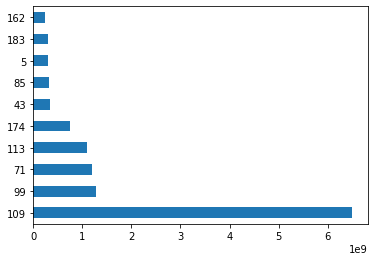

In [174]:
sorted_by_gross['Last Funding Amount'].head(10).plot(kind="barh")
plt.show()

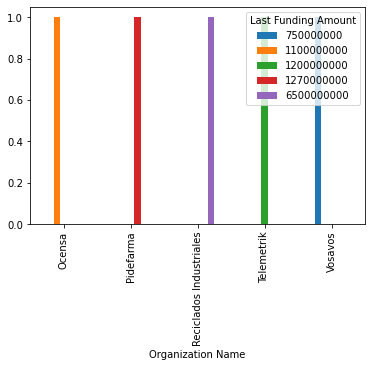

In [179]:
pd.crosstab(sorted_by_gross["Organization Name"].head(5),sorted_by_gross["Last Funding Amount"].head(5)).plot(kind='bar')

In [ ]:
# Tarea 
# 1 top 20 ciudades por concentracion de empresas
# Distribucion de ciudades por capital levantado
# Distribucion de ciudades por cap levantado por año
# Distribucion de ciudades por cap levantado por sector
# 15 rondas de financiacion mas grandes por año

In [ ]:
# 1 top 20 ciudades por concentracion de empresas

In [328]:
df_taller=sorted_by_gross 
# tabla de frecuencia de locations 
pd.value_counts(df_taller['Headquarters Location'])

Bogotá                                         140
Medellín                                        32
Cali, Valle del Cauca, Colombia                  5
Barranquilla, Atlantico, Colombia                2
UsaquÃ©n, Distrito Especial, Colombia            1
Cota, Cundinamarca, Colombia                     1
Valledupar, Cesar, Colombia                      1
Colombiano, Magdalena, Colombia                  1
Montenegro, Quindio, Colombia                    1
Santiago De Cali, Valle del Cauca, Colombia      1
Cundinamarca, Distrito Especial, Colombia        1
Cartagena, Bolivar, Colombia                     1
Brasilia, Distrito Especial, Colombia            1
Madrid, Distrito Especial, Colombia              1
Villavicencio, Meta, Colombia                    1
Rionegro, Antioquia, Colombia                    1
Name: Headquarters Location, dtype: int64

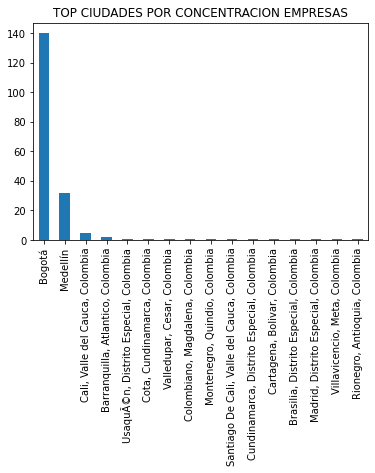

In [330]:
# Gráfico de barras de locations 
plot1 = df_taller["Headquarters Location"].value_counts().plot(kind='bar',  title='TOP CIUDADES POR CONCENTRACION EMPRESAS')

In [329]:
Tabla1= df_taller.pivot_table(values= 'Organization Name',  columns= "Headquarters Location", aggfunc ="count")
type(Tabla1) #index filas, columns columnas y values la interseccion, aggfunc si quiero mean o count o np.sum
Tabla1

Headquarters Location,"Barranquilla, Atlantico, Colombia",Bogotá,"Brasilia, Distrito Especial, Colombia","Cali, Valle del Cauca, Colombia","Cartagena, Bolivar, Colombia","Colombiano, Magdalena, Colombia","Cota, Cundinamarca, Colombia","Cundinamarca, Distrito Especial, Colombia","Madrid, Distrito Especial, Colombia",Medellín,"Montenegro, Quindio, Colombia","Rionegro, Antioquia, Colombia","Santiago De Cali, Valle del Cauca, Colombia","UsaquÃ©n, Distrito Especial, Colombia","Valledupar, Cesar, Colombia","Villavicencio, Meta, Colombia"
Organization Name,2,140,1,5,1,1,1,1,1,32,1,1,1,1,1,1


In [348]:
# Distribucion de ciudades por capital levantado

sorted_by_equity = df_taller.sort_values(['Last Equity Funding Amount'])
Tabla2= sorted_by_equity.pivot_table(index= 'Headquarters Location', values= 'Last Equity Funding Amount', aggfunc =np.sum)
Tabla2


,Last Equity Funding Amount
Headquarters Location,
"Barranquilla, Atlantico, Colombia",150180000
Bogotá,4652605377
"Brasilia, Distrito Especial, Colombia",100000
"Cali, Valle del Cauca, Colombia",12870000
"Cartagena, Bolivar, Colombia",15000
"Colombiano, Magdalena, Colombia",186813
"Cota, Cundinamarca, Colombia",6500000000
"Cundinamarca, Distrito Especial, Colombia",12000000
"Madrid, Distrito Especial, Colombia",108299


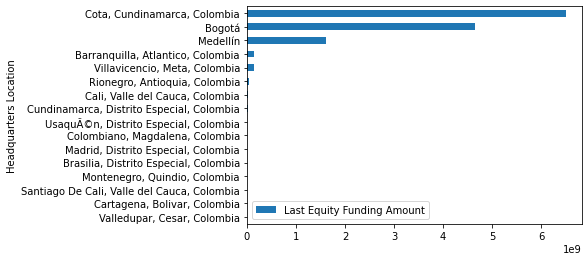

In [350]:
Tabla2.sort_values(['Last Equity Funding Amount']).plot(kind= "barh")

In [332]:

# Tabla de contingencia 
pd.crosstab(index=df_taller['Last Equity Funding Amount'],
            columns=df_taller['Headquarters Location'], margins=True)


Headquarters Location,"Barranquilla, Atlantico, Colombia",Bogotá,"Brasilia, Distrito Especial, Colombia","Cali, Valle del Cauca, Colombia","Cartagena, Bolivar, Colombia","Colombiano, Magdalena, Colombia","Cota, Cundinamarca, Colombia","Cundinamarca, Distrito Especial, Colombia","Madrid, Distrito Especial, Colombia",Medellín,"Montenegro, Quindio, Colombia","Rionegro, Antioquia, Colombia","Santiago De Cali, Valle del Cauca, Colombia","UsaquÃ©n, Distrito Especial, Colombia","Valledupar, Cesar, Colombia","Villavicencio, Meta, Colombia",All
Last Equity Funding Amount,,,,,,,,,,,,,,,,,
1000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10000,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
11934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1200000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1270000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [373]:
# Distribucion de ciudades por cap levantado por año

df_taller["year"] = df_taller["Founded Date"].dt.year  # extraigo el año de las fechas y se crea otra columna
df_taller

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD),year
109,Reciclados Industriales,https://www.crunchbase.com/organization/recicl...,"Industrial, Mining, Oil and Gas","Cota, Cundinamarca, Colombia",Expertos en el reaprovechamiento y reutilizaci...,59.524,2010-01-01 00:00:00,year,2017-08-31 00:00:00,6500000000,COP,2.203300e+06,6500000000,COP,2.203300e+06,2010
99,Pidefarma,https://www.crunchbase.com/organization/pidefarma,"Beauty, E-Commerce, Health Care, Internet",Bogotá,PideFarma.com is the first 100% virtual pharma...,55.321,2013-01-01 00:00:00,year,2015-05-01 00:00:00,1270000000,COP,5.317760e+05,1270000000,COP,5.317760e+05,2013
71,Telemetrik,https://www.crunchbase.com/organization/teleme...,"Industrial, Internet of Things, Marketing Auto...",Medellín,"Telemetrik specializes in the design, developm...",39.071,2006-09-15 00:00:00,day,2016-05-01 00:00:00,1200000000,COP,4.206750e+05,1200000000,COP,4.206750e+05,2006
113,Ocensa,https://www.crunchbase.com/organization/ocensa,Oil and Gas,Bogotá,Ocensa Colombia's crude oil transportation sys...,60.826,1994-12-16 00:00:00,day,2013-11-13 00:00:00,1100000000,USD,1.100000e+09,1100000000,USD,1.100000e+09,1994
174,Vosavos,https://www.crunchbase.com/organization/vosavos,"Child Care, Recruiting",Bogotá,Vosavos is an online platform that enables ind...,95.659,2013-01-01 00:00:00,year,2015-04-01 00:00:00,750000000,COP,2.912590e+05,750000000,COP,2.912590e+05,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Mis Finanzas Personales,https://www.crunchbase.com/organization/mis-fi...,"FinTech, Personal Finance",Bogotá,PFM - Fintech,98.341,2020-01-22 00:00:00,day,2020-01-22 00:00:00,10000,USD,1.000000e+04,10000,USD,1.000000e+04,2020
553,Milmenus.com,https://www.crunchbase.com/organization/milmen...,"Mobile, Restaurants",Bogotá,Milmenus is a Colombia-based restaurant menu g...,382.158,2010-06-07 00:00:00,day,2010-06-07 00:00:00,7500,USD,7.500000e+03,7500,USD,7.500000e+03,2010
205,Mi Plaza,https://www.crunchbase.com/organization/mi-plaza,"Delivery, E-Commerce, Food Delivery, Grocery, ...","Valledupar, Cesar, Colombia",Online Hard Disccount Supermarket,125.561,2017-10-01 00:00:00,month,2018-02-01 00:00:00,7000,USD,7.000000e+03,7000,USD,7.000000e+03,2017
167,SafeTalpa,https://www.crunchbase.com/organization/safetalpa,"Cloud Security, Cyber Security, Financial Serv...",Bogotá,Saving organizations from online financial fraud,92.451,2018-01-01 00:00:00,year,2019-07-15 00:00:00,1000,USD,1.000000e+03,35000,USD,3.500000e+04,2018


In [423]:
Tabla3= df_taller.pivot_table(index= 'year',values= ("Last Equity Funding Amount","Headquarters Location") , aggfunc =np.sum)
Tabla3 = Tabla3.sort_values(['Last Equity Funding Amount'],ascending=False )
Tabla3

,Headquarters Location,Last Equity Funding Amount
year,,
2010,"Cota, Cundinamarca, ColombiaBogotáBogotáSantia...",6520332500
2013,BogotáBogotáBogotáBogotáBogotáBogotáMedellínMe...,2044775437
2006,MedellínBogotá,1204000000
1994,Bogotá,1100000000
2011,BogotáBogotáBogotáMedellínBogotáBogotáBogotáBo...,778144210
2012,BogotáBogotáMedellínBogotáBogotáBogotáBogotáMe...,373859612
2015,BogotáBogotáBogotáMedellínMedellínBogotáBogotá...,348633299
2019,"Villavicencio, Meta, ColombiaBogotáBogotáBogot...",169821534
2016,"Barranquilla, Atlantico, ColombiaBogotáBogotáB...",164212897


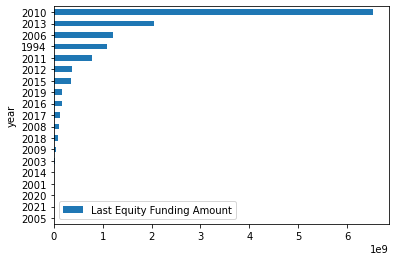

In [424]:
Tabla3.sort_values(['Last Equity Funding Amount']).plot(kind= "barh")

In [418]:
# Distribucion de ciudades por cap levantado por sector

Tabla4= df_taller.pivot_table(index= 'Industries',values= ("Last Equity Funding Amount","Headquarters Location") , aggfunc =np.sum)
Tabla4=Tabla4.sort_values(['Last Equity Funding Amount'],ascending=False)
Tabla4

,Headquarters Location,Last Equity Funding Amount
Industries,,
"Industrial, Mining, Oil and Gas","Cota, Cundinamarca, Colombia",6500000000
"Beauty, E-Commerce, Health Care, Internet",Bogotá,1270000000
"Industrial, Internet of Things, Marketing Automation",Medellín,1200000000
Oil and Gas,Bogotá,1100000000
"Child Care, Recruiting",Bogotá,750000000
...,...,...
"FinTech, Personal Finance",Bogotá,10000
"Advertising, Commercial Real Estate, Real Estate, Real Estate Investment",Bogotá,10000
"Mobile, Restaurants",Bogotá,7500


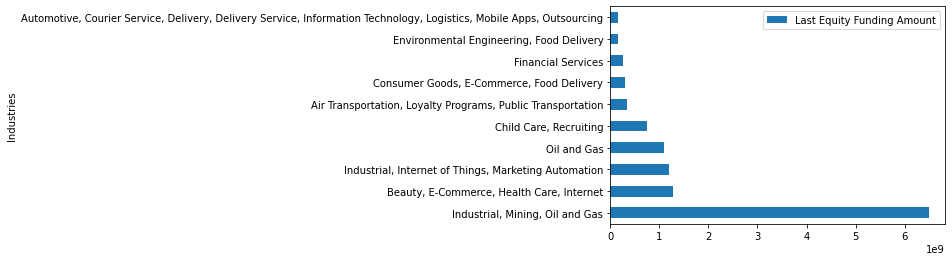

In [428]:
Tabla4.head(10).plot(kind= "barh")

In [ ]:
# 15 rondas de financiacion mas grandes por año
# usaremos los años de mas de 15datos

In [439]:
pd.value_counts(df_taller["year"])

2018    30
2017    28
2012    18
2019    18
2015    18
2011    15
2016    13
2014    13
2013    11
2020     9
2010     5
2009     3
2008     3
2006     2
2003     1
2001     1
2021     1
2005     1
1994     1
Name: year, dtype: int64

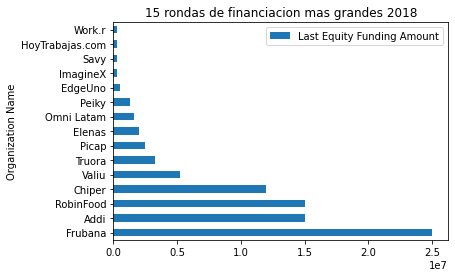

In [463]:
in_2018=df_taller["year"] ==2018
df_2018= df_taller[in_2018] # creamos df solo con datos 2018
df_2018_tabla= df_2018.pivot_table(index= 'Organization Name', values= 'Last Equity Funding Amount', aggfunc =np.sum)
df_2018_tabla=df_2018_tabla.sort_values(['Last Equity Funding Amount'],ascending= False )
df_2018_tabla.head(15).plot(kind= "barh",title= "15 rondas de financiacion mas grandes 2018" )

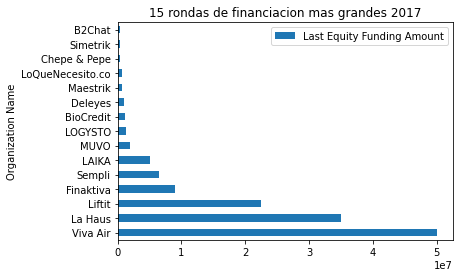

In [465]:
in_2017=df_taller["year"] ==2017
df_2017= df_taller[in_2017] # creamos df solo con datos 2018
df_2017_tabla= df_2017.pivot_table(index= 'Organization Name', values= 'Last Equity Funding Amount', aggfunc =np.sum)
df_2017_tabla=df_2017_tabla.sort_values(['Last Equity Funding Amount'],ascending= False )
df_2017_tabla.head(15).plot(kind= "barh",title= "15 rondas de financiacion mas grandes 2017" )

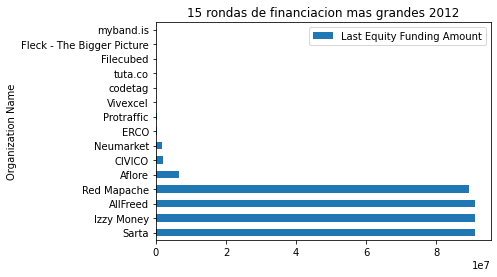

In [466]:
in_2012=df_taller["year"] ==2012
df_2012= df_taller[in_2012] # creamos df solo con datos 2018
df_2012_tabla= df_2012.pivot_table(index= 'Organization Name', values= 'Last Equity Funding Amount', aggfunc =np.sum)
df_2012_tabla=df_2012_tabla.sort_values(['Last Equity Funding Amount'],ascending= False )
df_2012_tabla.head(15).plot(kind= "barh",title= "15 rondas de financiacion mas grandes 2012" )

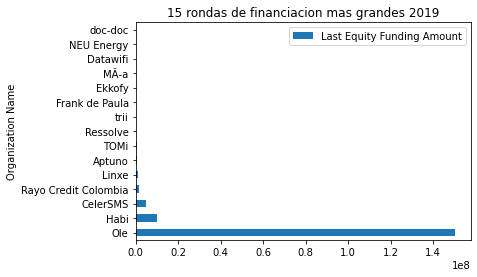

In [467]:
in_2019=df_taller["year"] ==2019
df_2019= df_taller[in_2019] # creamos df solo con datos 2018
df_2019_tabla= df_2019.pivot_table(index= 'Organization Name', values= 'Last Equity Funding Amount', aggfunc =np.sum)
df_2019_tabla=df_2019_tabla.sort_values(['Last Equity Funding Amount'],ascending= False )
df_2019_tabla.head(15).plot(kind= "barh",title= "15 rondas de financiacion mas grandes 2019" )

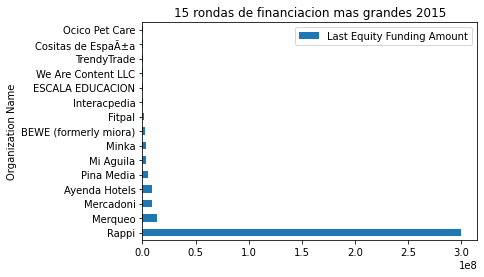

In [468]:
in_2015=df_taller["year"] ==2015
df_2015= df_taller[in_2015] # creamos df solo con datos 2018
df_2015_tabla= df_2015.pivot_table(index= 'Organization Name', values= 'Last Equity Funding Amount', aggfunc =np.sum)
df_2015_tabla=df_2015_tabla.sort_values(['Last Equity Funding Amount'],ascending= False )
df_2015_tabla.head(15).plot(kind= "barh",title= "15 rondas de financiacion mas grandes 2015" )

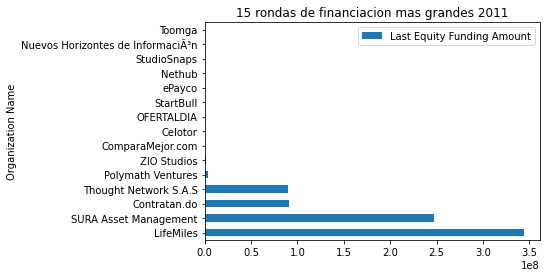

In [469]:
in_2011=df_taller["year"] ==2011
df_2011= df_taller[in_2011] # creamos df solo con datos 2018
df_2011_tabla= df_2011.pivot_table(index= 'Organization Name', values= 'Last Equity Funding Amount', aggfunc =np.sum)
df_2011_tabla=df_2011_tabla.sort_values(['Last Equity Funding Amount'],ascending= False )
df_2011_tabla.head(15).plot(kind= "barh",title= "15 rondas de financiacion mas grandes 2011" )